In [1]:
config_file = 'config_run3.json'

# Eval

In [2]:
import os
import json
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

with open(config_file) as config:
    info = json.load(config)

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= info['simul']['gpu_id']

In [3]:
metric_path = info['output']['metric_path']
df = pd.read_csv(os.path.join(metric_path, 'metric.csv'))

iter = np.array(df['iter'])
C_vec = np.array(df['C_vec'])
C_cs = np.array(df['C_cs'])
En_1 = np.array(df['1-En'])
Em_1 = np.array(df['1-Em'])
eps = np.array(df['eps'])
eps_p = np.array(df['eps_p'])
sig_J = np.array(df['sig_J'])
L1 = np.array(df['L1'])
L2 = np.array(df['L2'])
curlB = np.array(df['curlB'])
BC_loss = np.array(df['BC_loss'])
lambda_BC = np.array(df['lambda_BC'])
Div_loss = np.array(df['Div_loss'])
lambda_div = np.array(df['lambda_div'])
FF_loss = np.array(df['FF_loss'])
lambda_ff = np.array(df['lambda_ff'])
loss = lambda_BC*BC_loss + lambda_div*Div_loss + lambda_ff*FF_loss

metrics = {r'$C_{\text{vec}}$':C_vec,
           r'$C_{\text{CS}}$':C_cs,
           r'$E^{\prime}_{n}$':En_1,
           r'$E^{\prime}_{m}$':Em_1,
           r'$\epsilon$':eps,
           r'$\epsilon_p$':eps_p,
           r'$CW_{\text{sin}}$':sig_J,
           r'$L_1$':L1,
           r'$L_2$':L2,
           r'$|J_B|/|J_b|$':curlB,
           r'$\mathcal{L}_b$':BC_loss,
           r'$w_b$':lambda_BC,
           r'$\mathcal{L}_\text{div}$':Div_loss,
           r'$w_\text{div}$':lambda_div,
           r'$\mathcal{L}_\text{ff}$':FF_loss,
           r'$w_\text{ff}$':lambda_ff,
           r'$w_b\mathcal{L}_b$':lambda_BC*BC_loss,
           r'$w_\text{div}\mathcal{L}_\text{div}$':lambda_div*Div_loss,
           r'$w_\text{ff}\mathcal{L}_\text{ff}$':lambda_ff*FF_loss,
           r'$\mathcal{L}$':loss,}

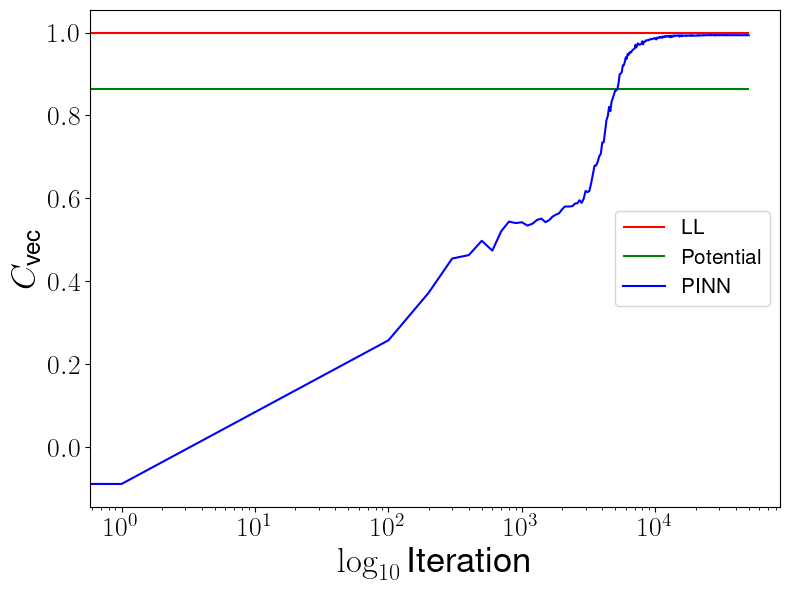

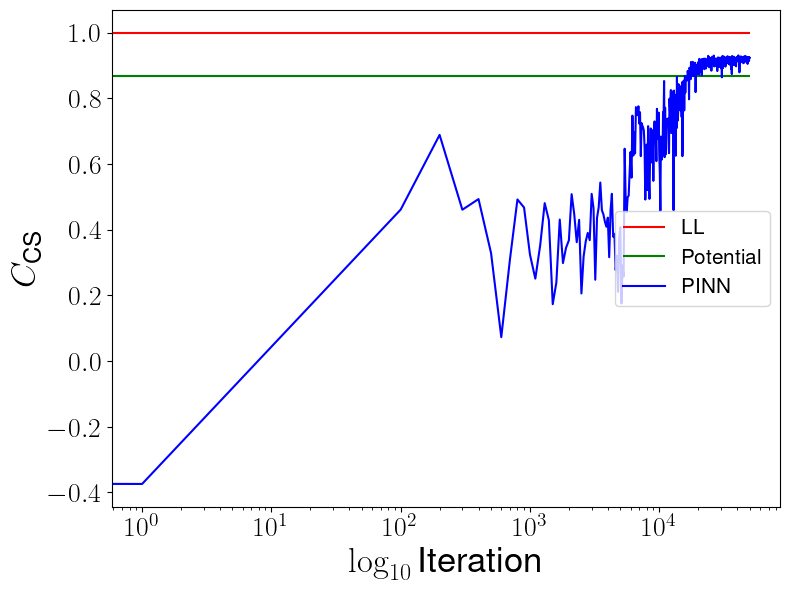

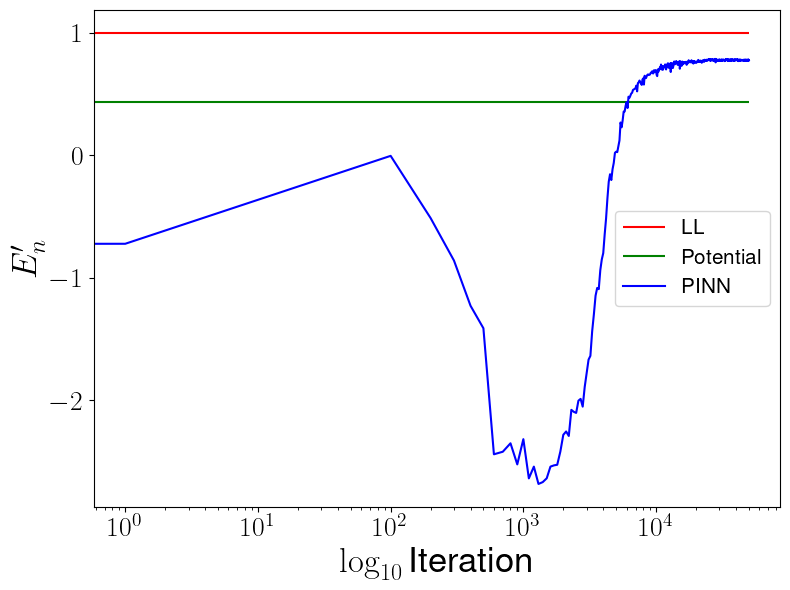

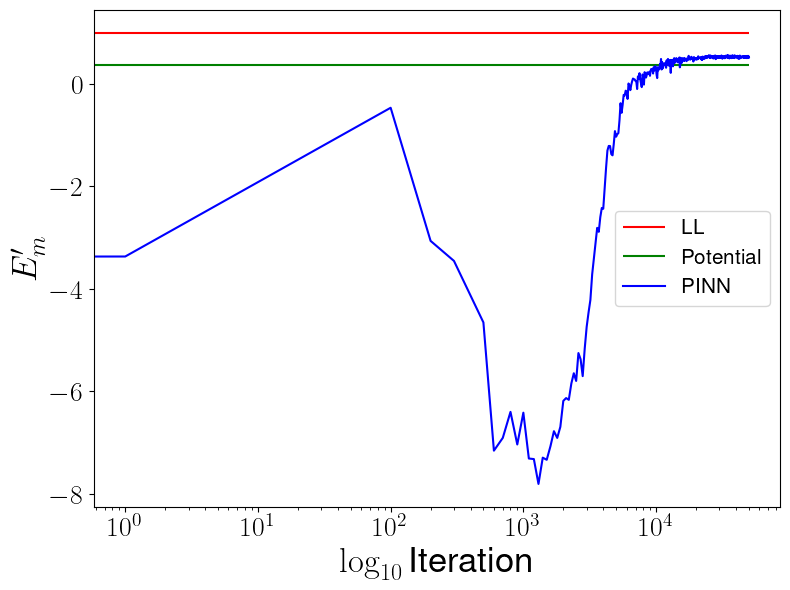

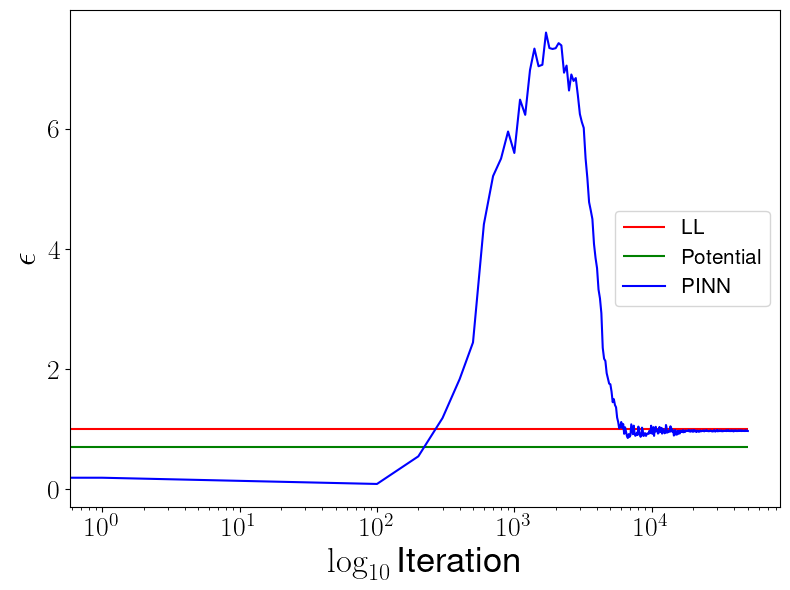

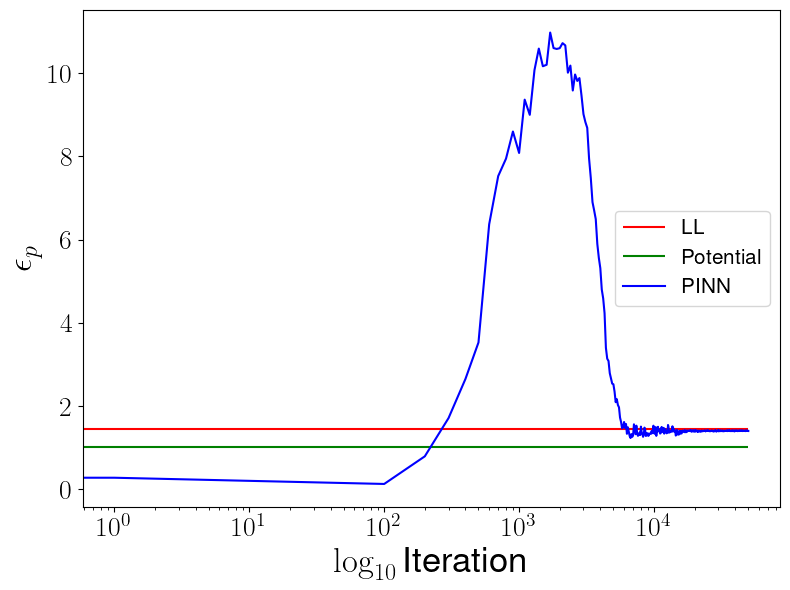

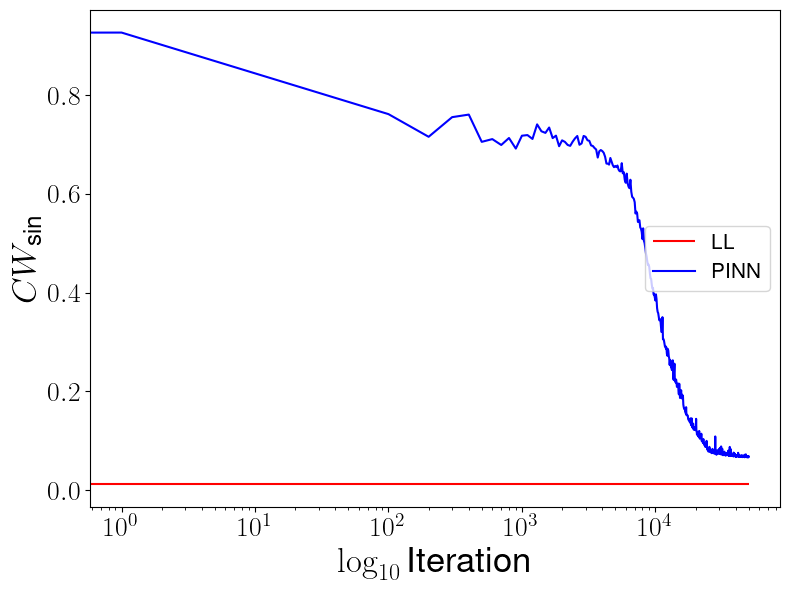

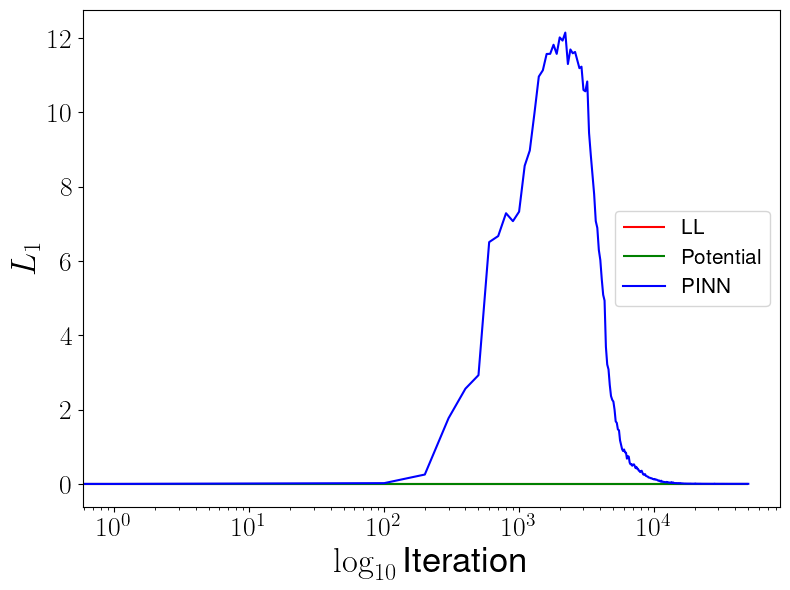

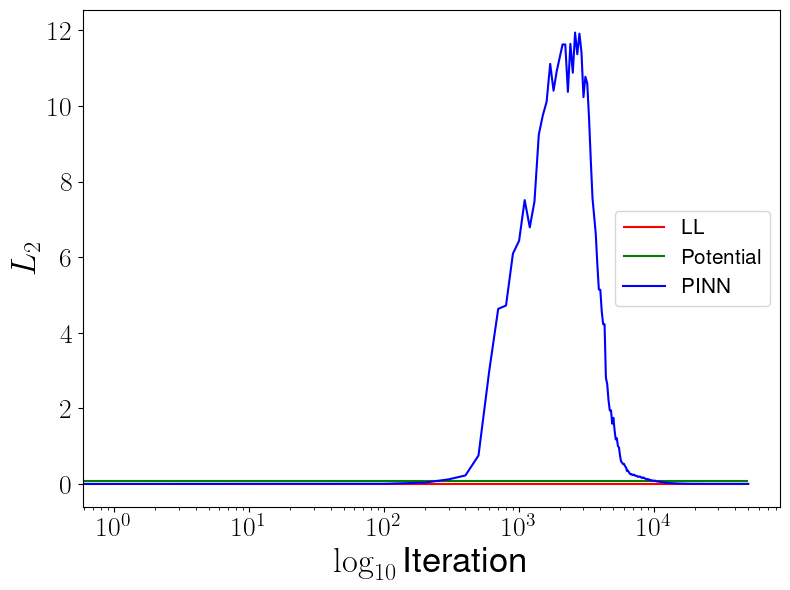

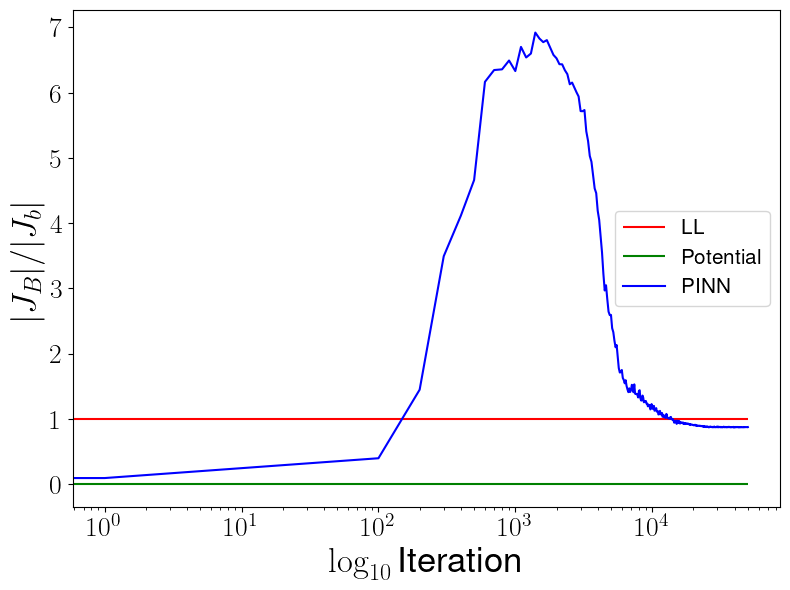

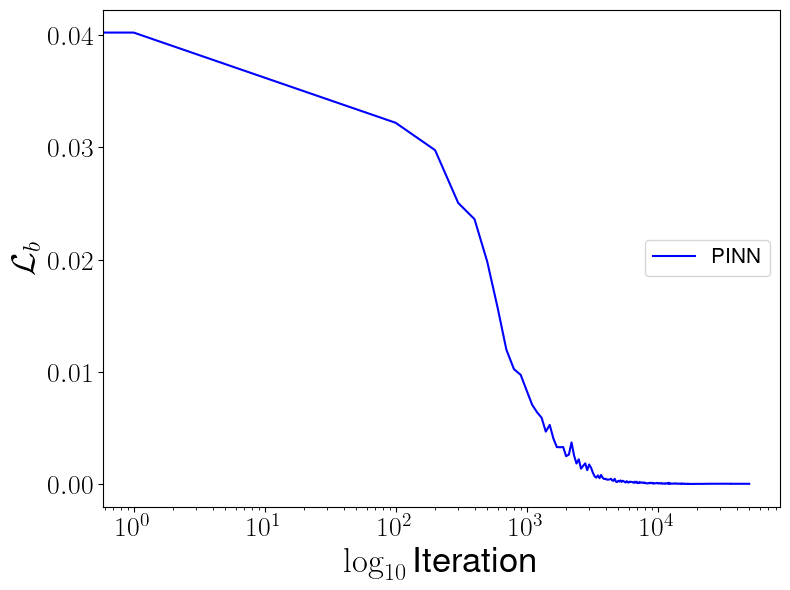

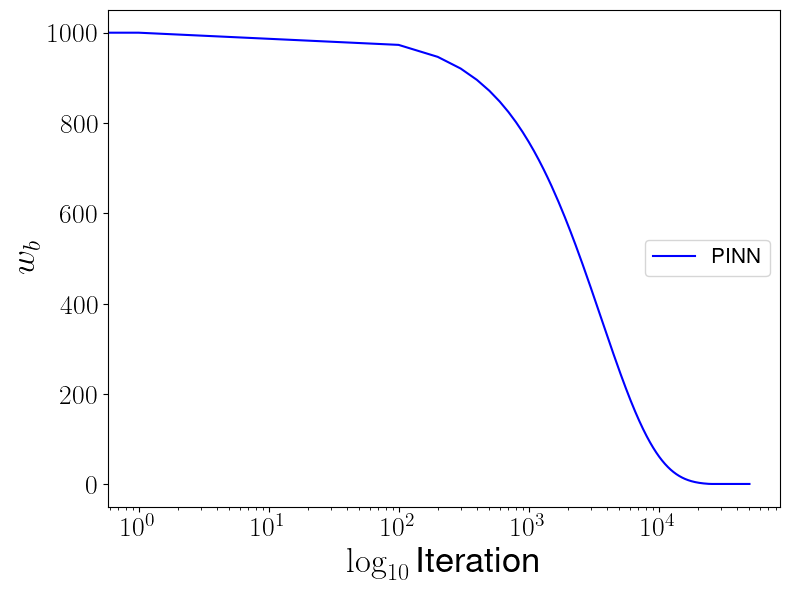

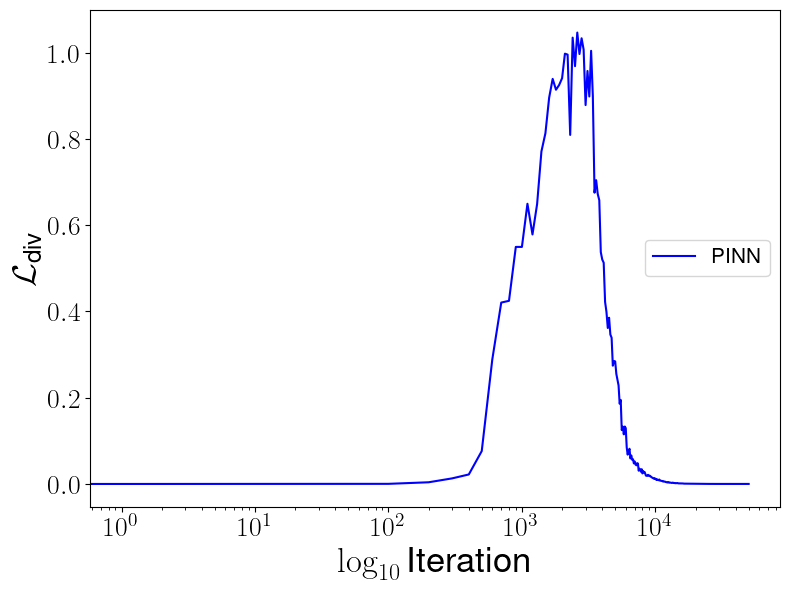

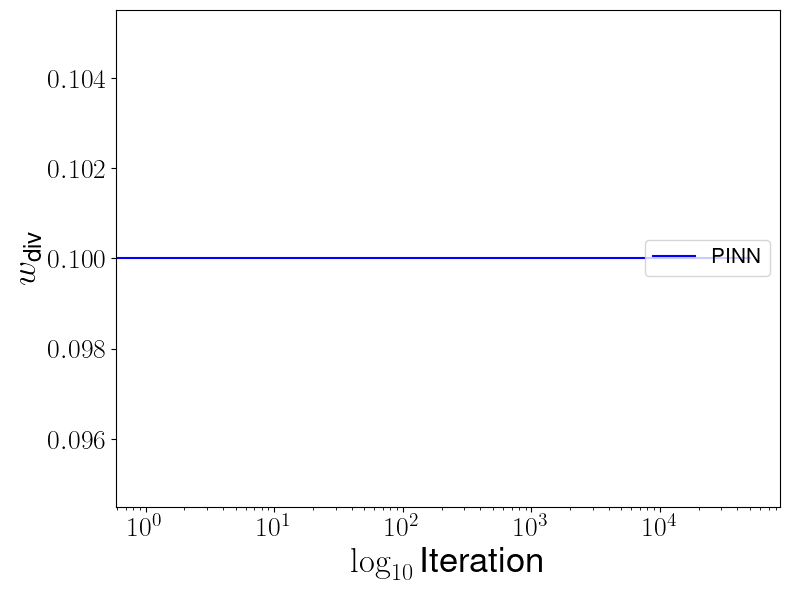

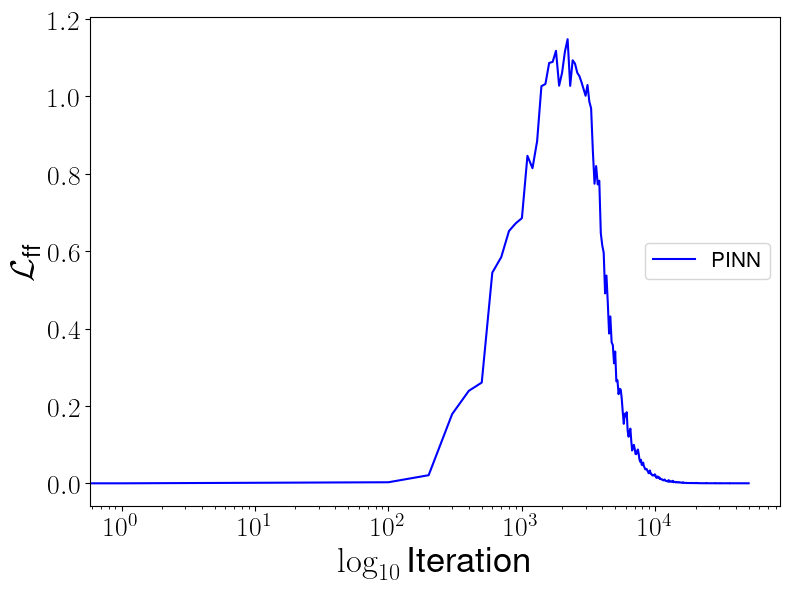

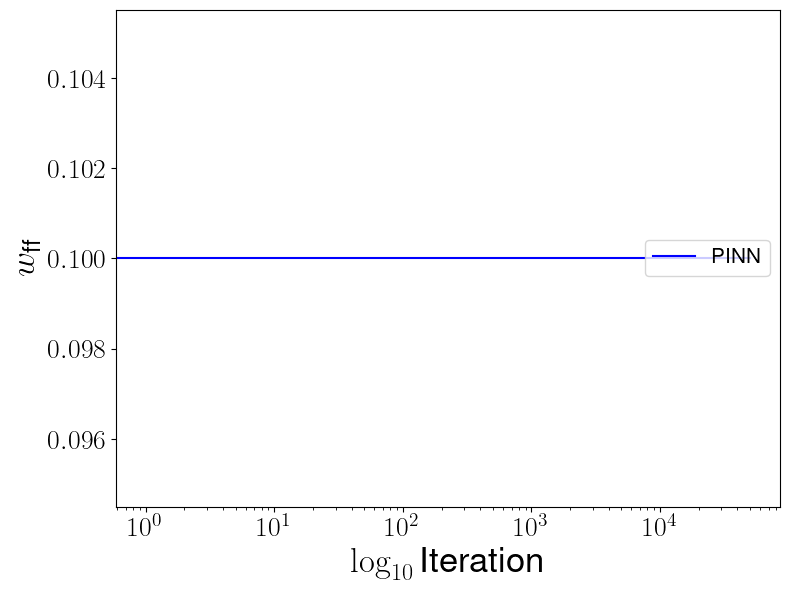

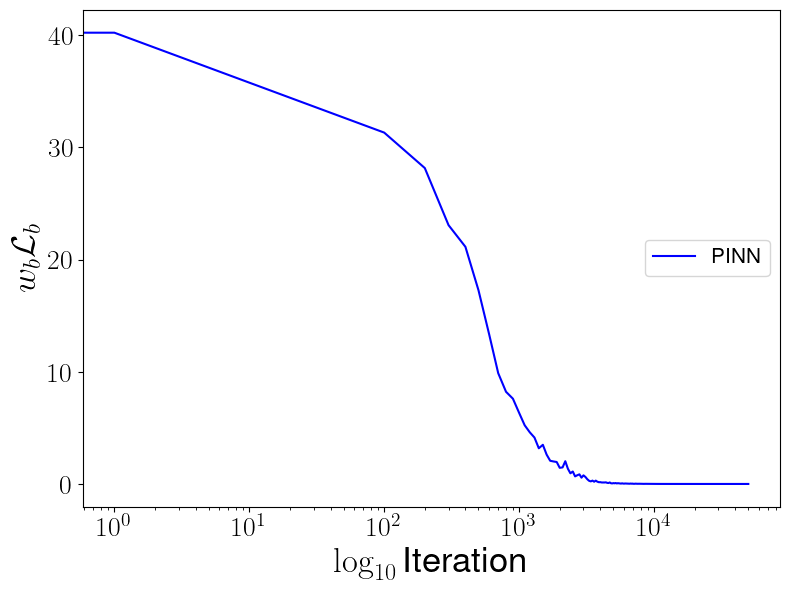

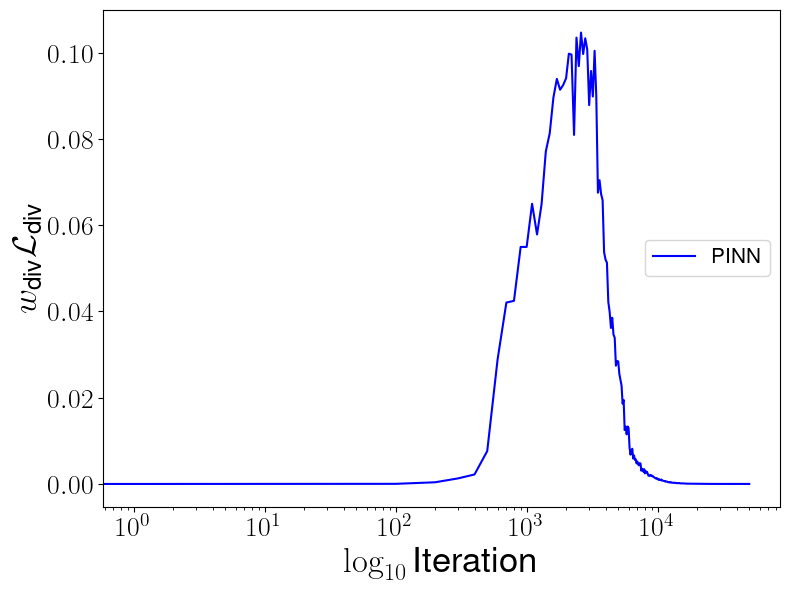

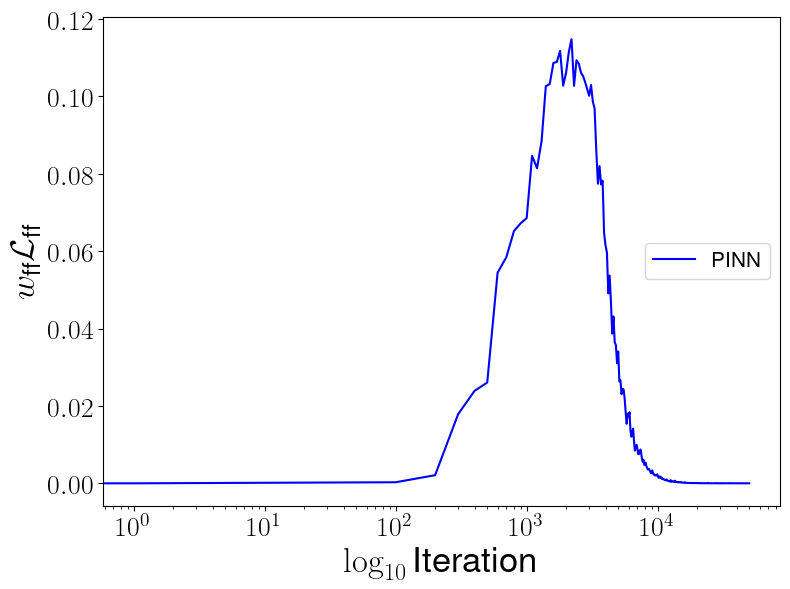

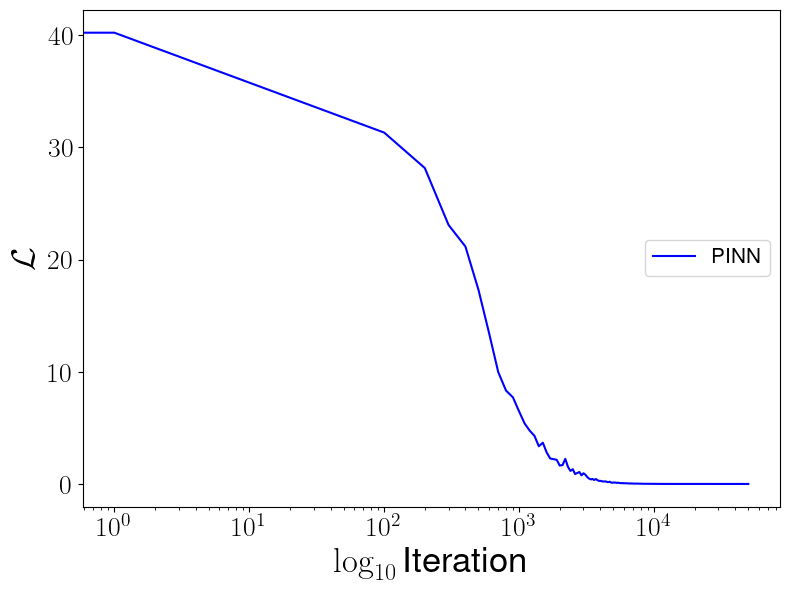

In [4]:
import codecs
def plot_metric(metrics, img_path):
    for label, metric in metrics.items():
        fig, ax = plt.subplots(figsize=(8,6))
        ax.set_xscale('log', base=10)
        if not (np.isnan(metric[0]) and np.isnan(metric[1])):
            ax.hlines(metric[0], xmin=iter[2], xmax=iter[-1], color='red', label='LL')
            if not (label in [r'$CW_{\text{sin}}$']):
                ax.hlines(metric[1], xmin=iter[2], xmax=iter[-1], color='green', label='Potential')
        ax.plot(iter[2:], metric[2:], color='blue', label='PINN')
        ax.set_ylabel(label, fontsize=25)
        ax.legend(loc='center right', fontsize=15)
        ax.set_xlabel(r'$\log_{10} \text{Iteration}$', fontsize=25)
        ax.tick_params(axis='both', which='major', labelsize=20)
        # ax.tick_params(axis='both', which='minor', labelsize=8)
        label = label.replace('$', '')
        label = label.replace('\\', '')
        label = label.replace('/', '')
        label = codecs.decode(label, 'unicode_escape')
        plt.tight_layout()
        fig.savefig(os.path.join(img_path, f'{label}_xlog.png'), dpi=600)

img_path = info['eval']['img_path']
# os.makedirs(img_path, exist_ok=False)
plot_metric(metrics, img_path)

In [ ]:
import codecs
from matplotlib.scale import LogScale

metrics_log = {r'$\log_{10} C_{\text{vec}}$':C_vec,
           r'$\log_{10} C_{\text{CS}}$':C_cs,
           r'$\log_{10} E^{\prime}_{n}$':En_1,
           r'$\log_{10} E^{\prime}_{m}$':Em_1,
           r'$\log_{10} \epsilon$':eps,
           r'$\log_{10} \epsilon_p$':eps_p,
           r'$\log_{10} CW_{\text{sin}}$':sig_J,
           r'$\log_{10} L_1$':L1,
           r'$\log_{10} L_2$':L2,
           r'$\log_{10} |J_B|/|J_b|$':curlB,
           r'$\log_{10} \mathcal{L}_b$':BC_loss,
           r'$\log_{10} w_b$':lambda_BC,
           r'$\log_{10} \mathcal{L}_\text{div}$':Div_loss,
           r'$\log_{10} w_\text{div}$':lambda_div,
           r'$\log_{10} \mathcal{L}_\text{ff}$':FF_loss,
           r'$\log_{10} w_\text{ff}$':lambda_ff,
           r'$\log_{10} w_b\mathcal{L}_b$':lambda_BC*BC_loss,
           r'$\log_{10} w_\text{div}\mathcal{L}_\text{div}$':lambda_div*Div_loss,
           r'$\log_{10} w_\text{ff}\mathcal{L}_\text{ff}$':lambda_ff*FF_loss,
           r'$\log_{10} \mathcal{L}$':loss,}
def plot_metric(metrics, img_path):
    for label, metric in metrics.items():
        fig, ax = plt.subplots(figsize=(8,6))
        ax.set_yscale('log', base=10)
        if not (np.isnan(metric[0]) and np.isnan(metric[1])):
            ax.hlines(metric[0], xmin=iter[2], xmax=iter[-1], color='red', label='LL')
            if not (label in [r'$CW_{\text{sin}}$']):
                ax.hlines(metric[1], xmin=iter[2], xmax=iter[-1], color='green', label='Potential')
        ax.plot(iter[2:], metric[2:], color='blue', label='PINN')
        ax.set_ylabel(label, fontsize=25)
        ax.legend(loc='center right', fontsize=15)
        ax.set_xlabel('Iteration', fontsize=25)
        ax.tick_params(axis='both', which='major', labelsize=20)
        # ax.tick_params(axis='both', which='minor', labelsize=8)
        label = label.replace('$', '')
        label = label.replace('\\', '')
        label = label.replace('/', '')
        label = codecs.decode(label, 'unicode_escape')
        plt.tight_layout()
        fig.savefig(os.path.join(img_path, f'{label}_ylog.png'), dpi=600)

img_path = info['eval']['img_path']
# os.makedirs(img_path, exist_ok=False)
plot_metric(metrics_log, img_path)

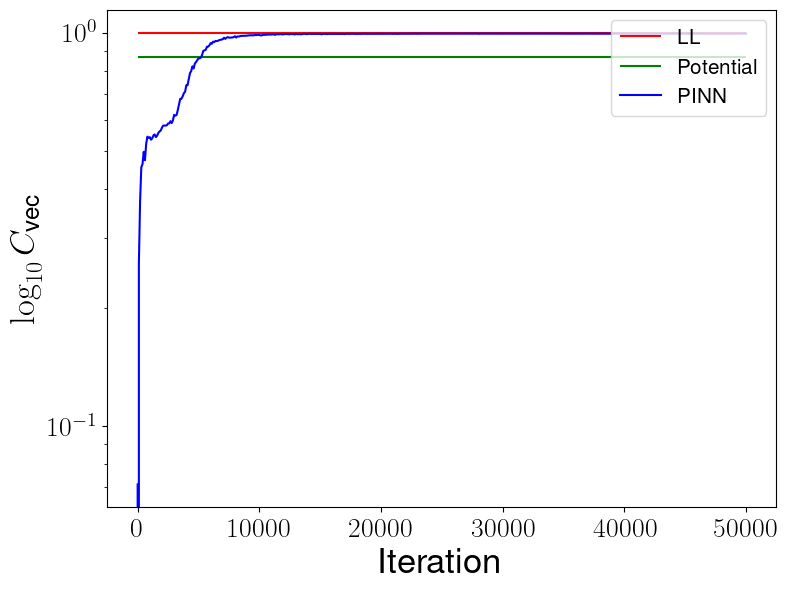

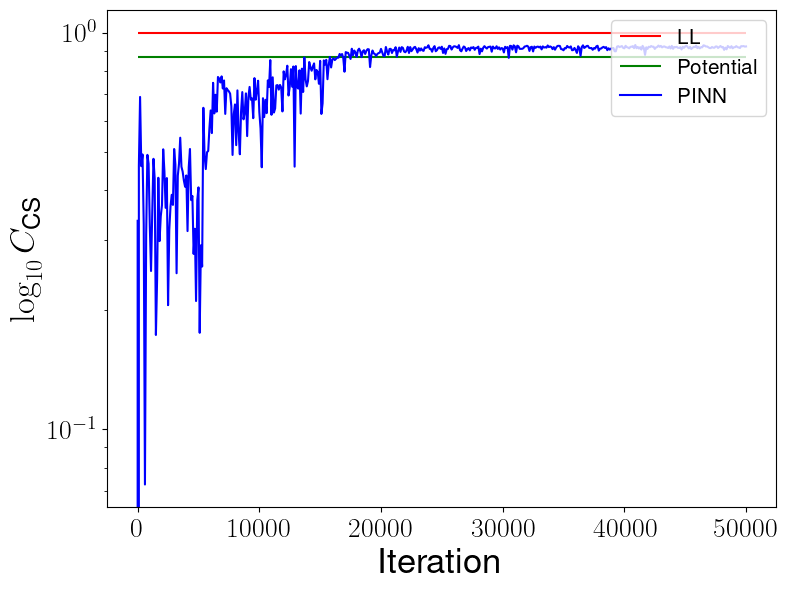

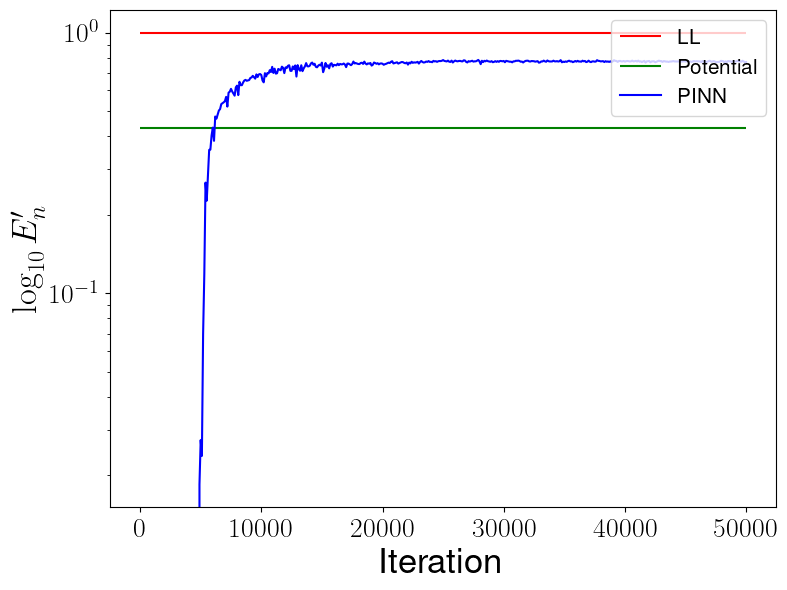

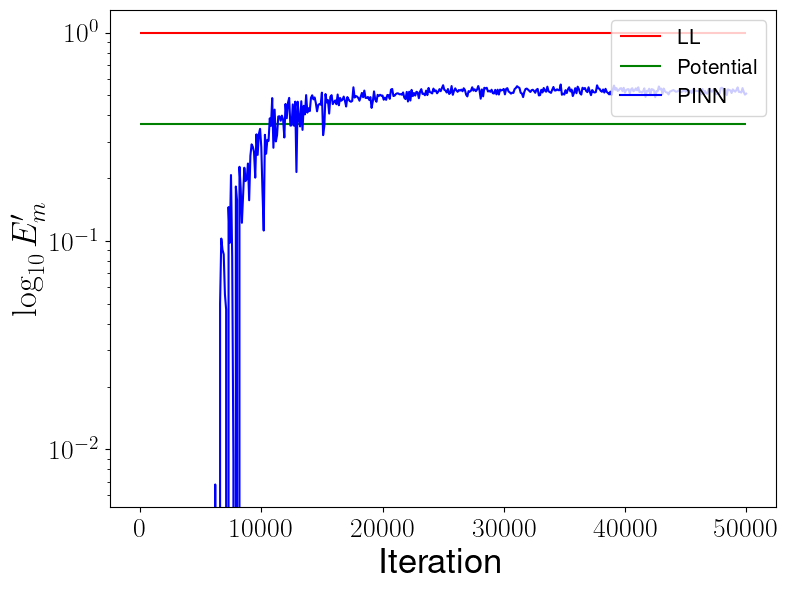

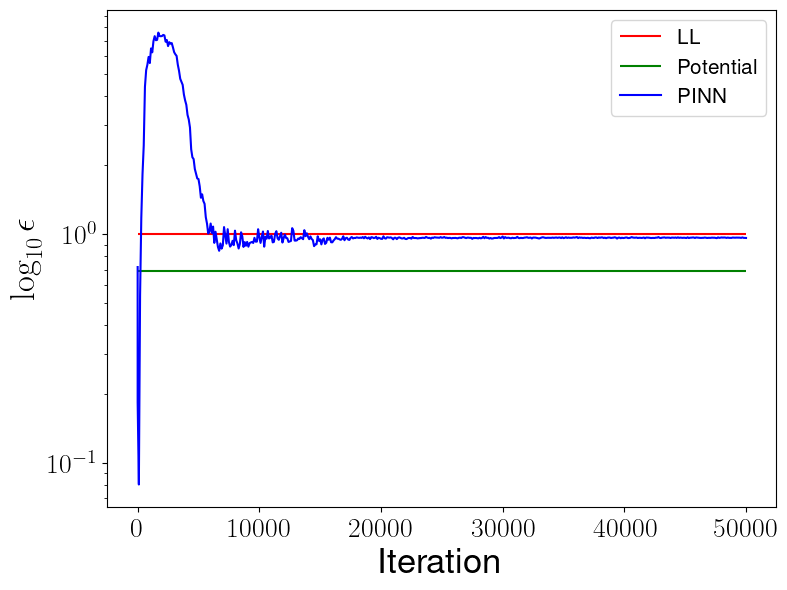

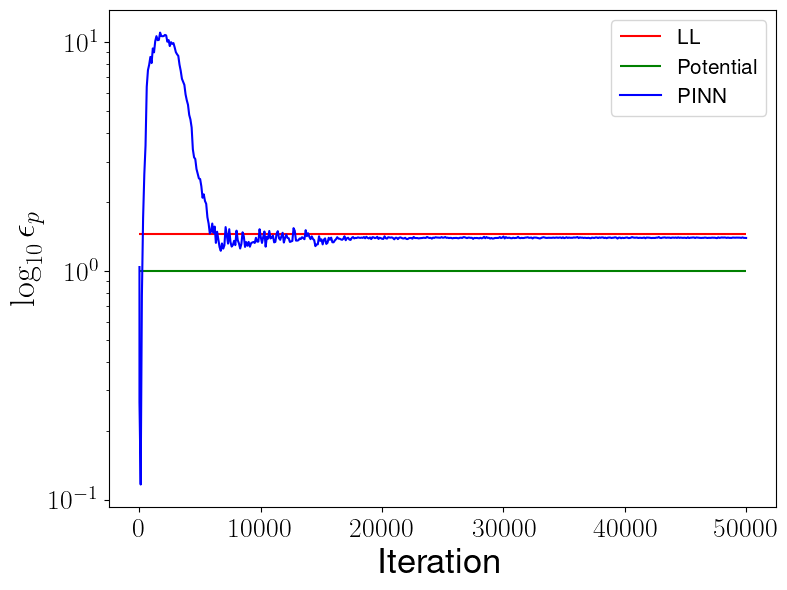

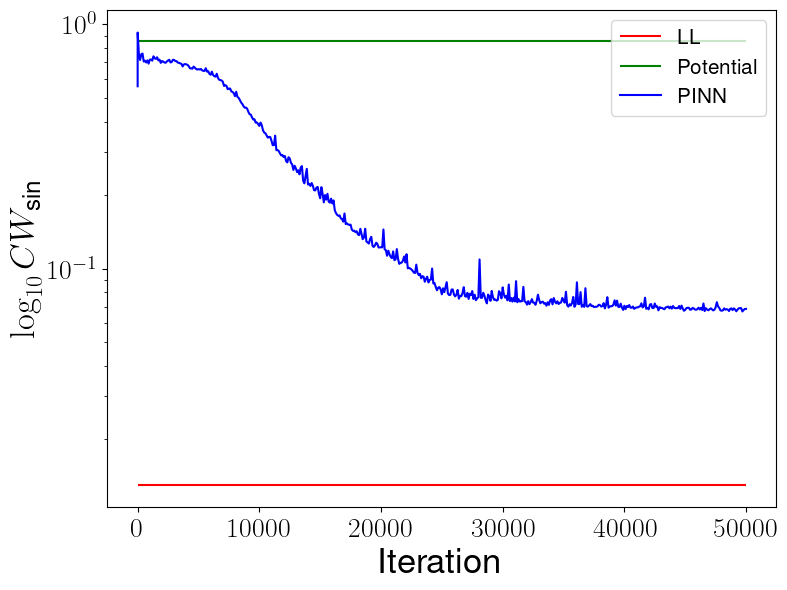

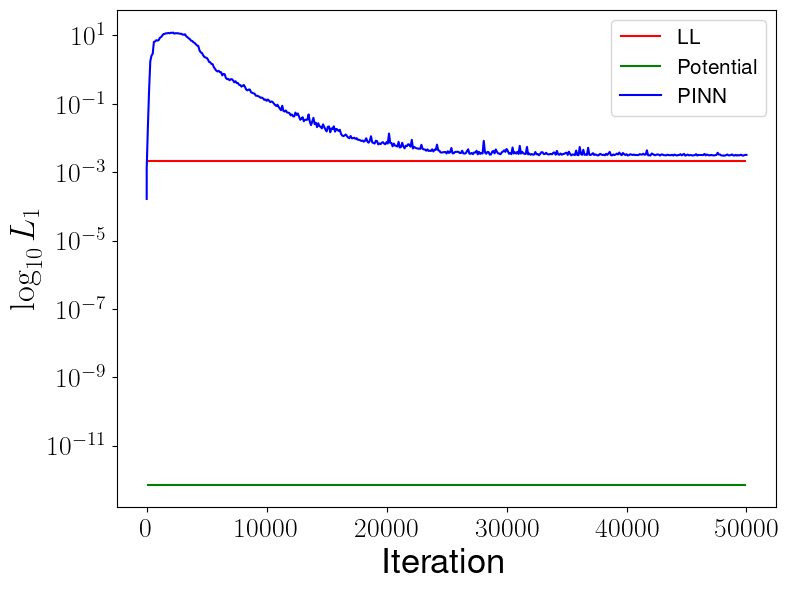

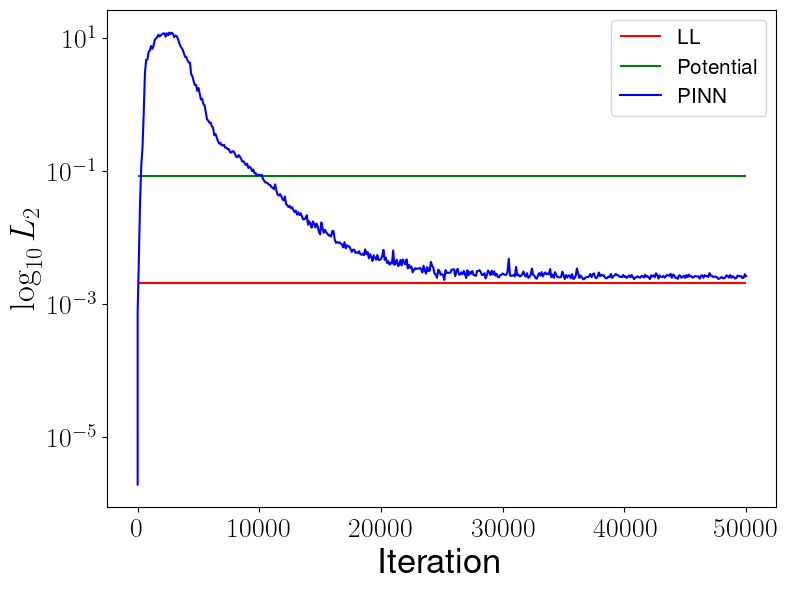

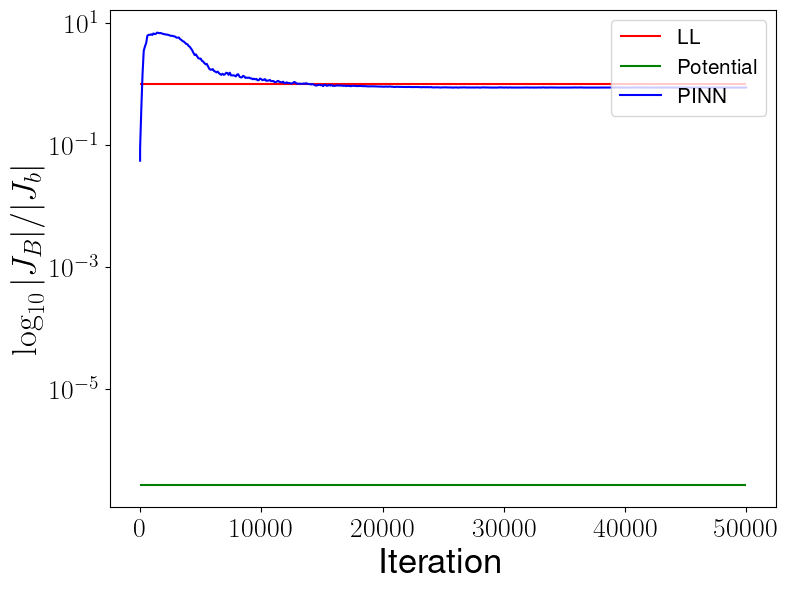

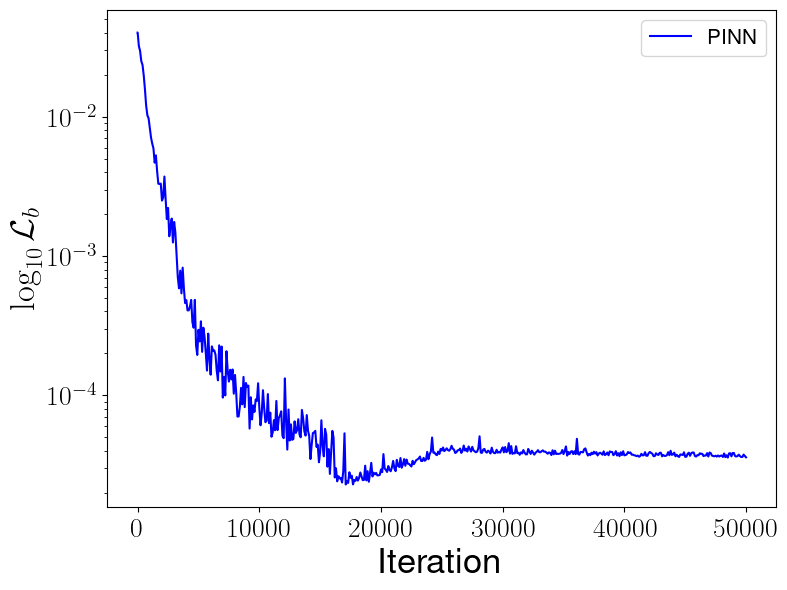

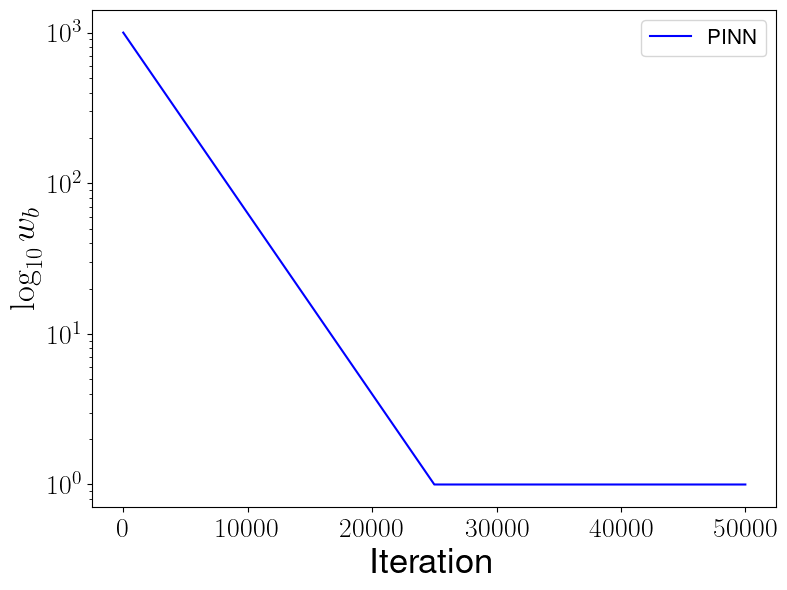

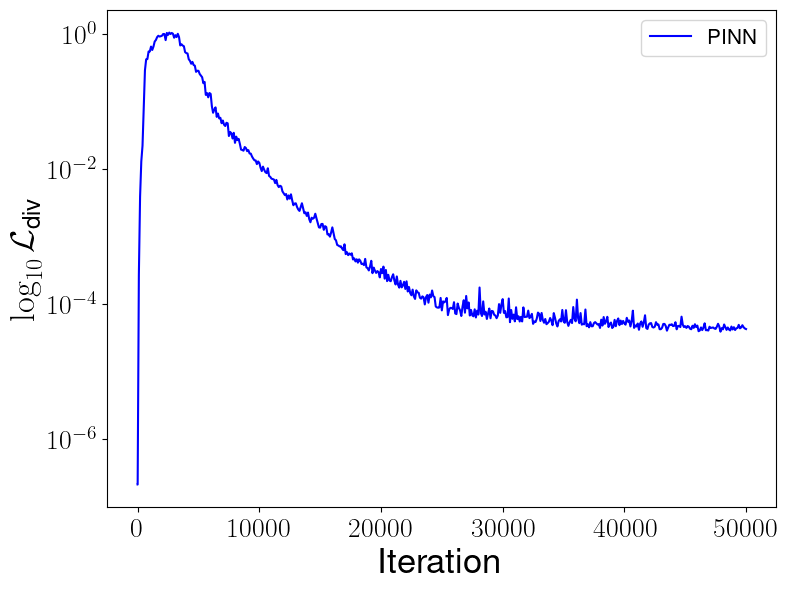

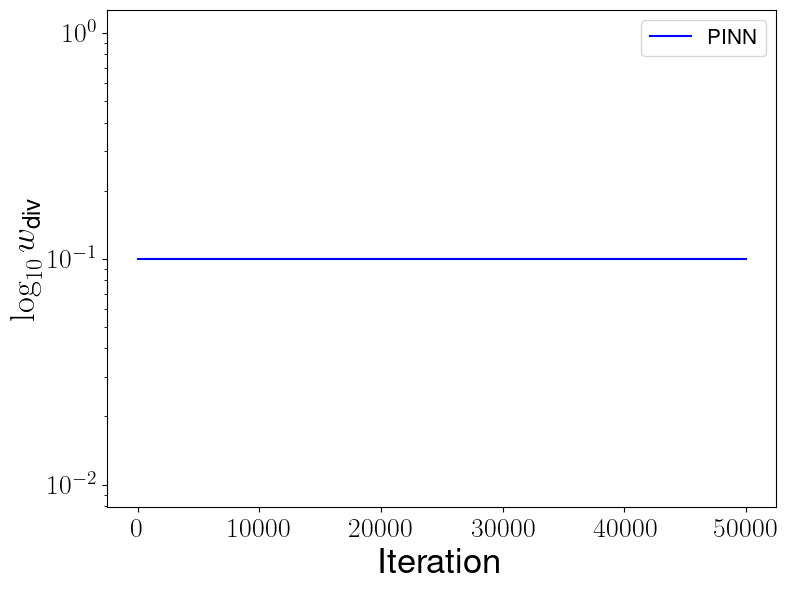

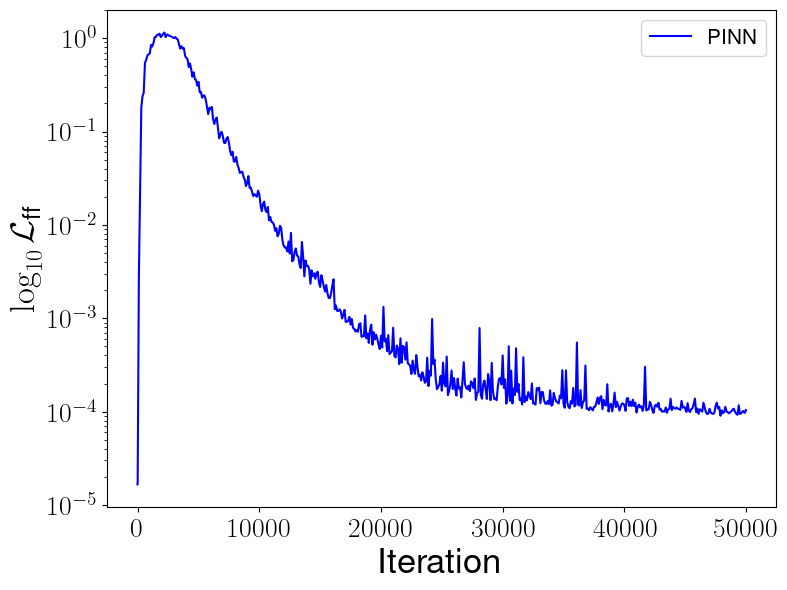

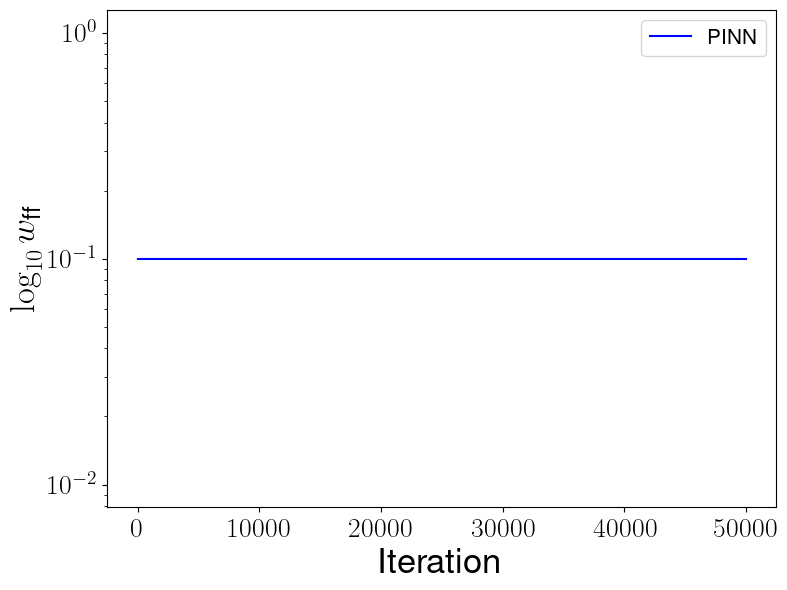

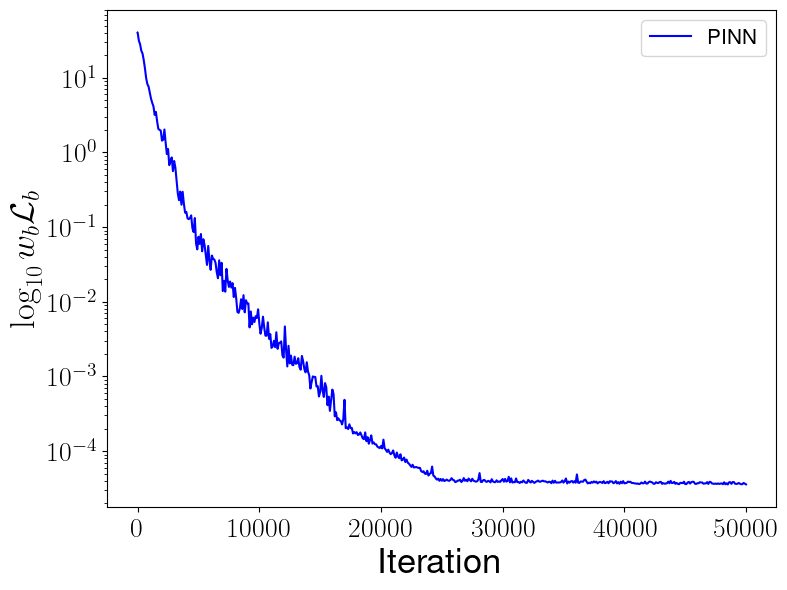

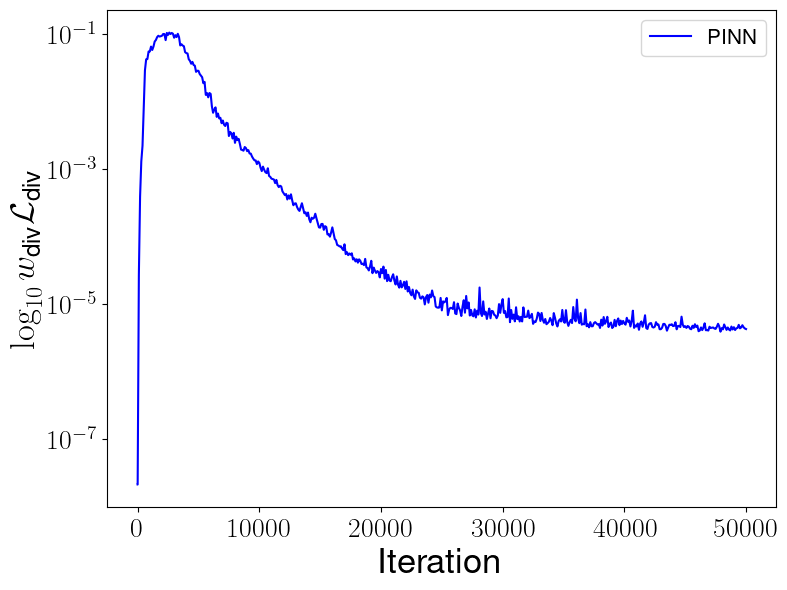

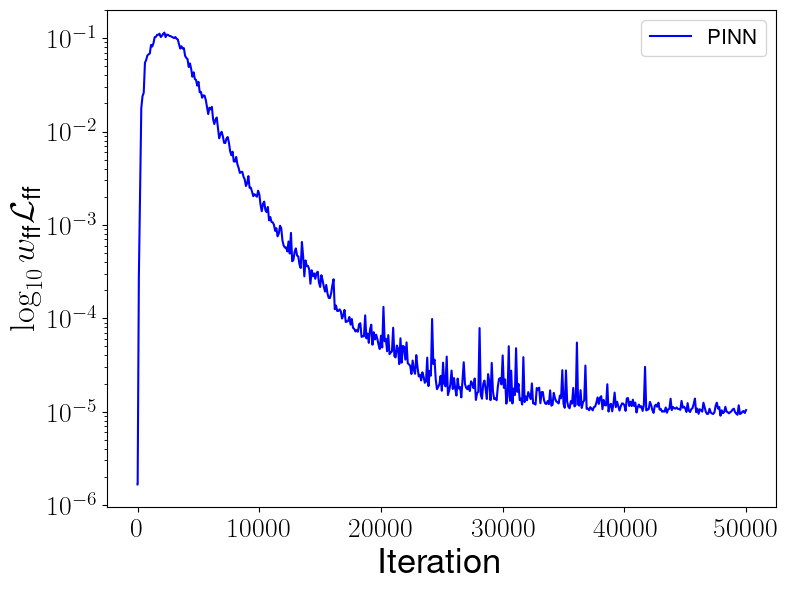

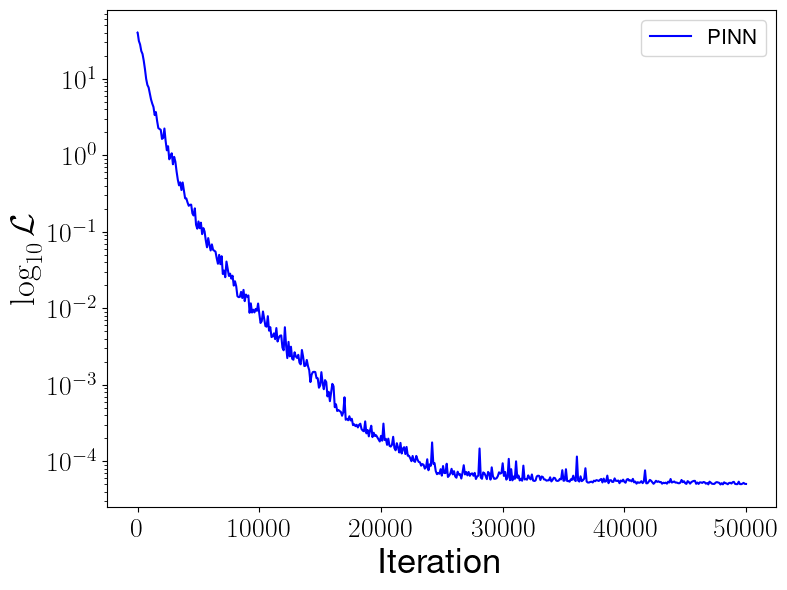

In [5]:
import codecs
from matplotlib.scale import LogScale

metrics_log = {r'$\log_{10} C_{\text{vec}}$':C_vec,
           r'$\log_{10} C_{\text{CS}}$':C_cs,
           r'$\log_{10} E^{\prime}_{n}$':En_1,
           r'$\log_{10} E^{\prime}_{m}$':Em_1,
           r'$\log_{10} \epsilon$':eps,
           r'$\log_{10} \epsilon_p$':eps_p,
           r'$\log_{10} CW_{\text{sin}}$':sig_J,
           r'$\log_{10} L_1$':L1,
           r'$\log_{10} L_2$':L2,
           r'$\log_{10} |J_B|/|J_b|$':curlB,
           r'$\log_{10} \mathcal{L}_b$':BC_loss,
           r'$\log_{10} w_b$':lambda_BC,
           r'$\log_{10} \mathcal{L}_\text{div}$':Div_loss,
           r'$\log_{10} w_\text{div}$':lambda_div,
           r'$\log_{10} \mathcal{L}_\text{ff}$':FF_loss,
           r'$\log_{10} w_\text{ff}$':lambda_ff,
           r'$\log_{10} w_b\mathcal{L}_b$':lambda_BC*BC_loss,
           r'$\log_{10} w_\text{div}\mathcal{L}_\text{div}$':lambda_div*Div_loss,
           r'$\log_{10} w_\text{ff}\mathcal{L}_\text{ff}$':lambda_ff*FF_loss,
           r'$\log_{10} \mathcal{L}$':loss,}
def plot_metric(metrics, img_path):
    for label, metric in metrics.items():
        fig, ax = plt.subplots(figsize=(8,6))
        ax.set_yscale('log', base=10)
        if not (np.isnan(metric[0]) and np.isnan(metric[1])):
            ax.hlines(metric[0], xmin=iter[2], xmax=iter[-1], color='red', label='LL')
            if not (label in [r'$CW_{\text{sin}}$']):
                ax.hlines(metric[1], xmin=iter[2], xmax=iter[-1], color='green', label='Potential')
        ax.plot(iter[2:], metric[2:], color='blue', label='PINN')
        ax.set_ylabel(label, fontsize=25)
        ax.legend(loc='upper right', fontsize=15)
        ax.set_xlabel('Iteration', fontsize=25)
        ax.tick_params(axis='both', which='major', labelsize=20)
        # ax.tick_params(axis='both', which='minor', labelsize=8)
        label = label.replace('$', '')
        label = label.replace('\\', '')
        label = label.replace('/', '')
        label = codecs.decode(label, 'unicode_escape')
        plt.tight_layout()
        fig.savefig(os.path.join(img_path, f'{label}_ylog_l.png'), dpi=600)

img_path = info['eval']['img_path']
# os.makedirs(img_path, exist_ok=False)
plot_metric(metrics_log, img_path)

In [6]:
metrics['$\\mathcal{L}$']

array([           nan,            nan, 4.02356999e+01, 4.02245839e+01,
       3.13201678e+01, 2.81617142e+01, 2.30875739e+01, 2.11652122e+01,
       1.73011905e+01, 1.34146862e+01, 9.97838005e+00, 8.32309376e+00,
       7.72180991e+00, 6.46576824e+00, 5.38028651e+00, 4.74356214e+00,
       4.28964632e+00, 3.36057559e+00, 3.67470514e+00, 2.81253261e+00,
       2.26879204e+00, 2.20773160e+00, 2.15362118e+00, 1.63887957e+00,
       1.68706136e+00, 2.24128561e+00, 1.53825959e+00, 1.16205782e+00,
       1.31581569e+00, 8.86566308e-01, 9.82130844e-01, 1.06366771e+00,
       7.63937356e-01, 9.55077216e-01, 8.25612254e-01, 6.15032107e-01,
       4.80499857e-01, 4.05037444e-01, 4.43475644e-01, 3.51860410e-01,
       4.41332861e-01, 3.48885222e-01, 2.74668703e-01, 2.73406452e-01,
       2.41987620e-01, 2.18934625e-01, 2.25741675e-01, 2.26376501e-01,
       1.73949460e-01, 1.63561154e-01, 2.02548102e-01, 1.23591117e-01,
       1.09845746e-01, 1.36645132e-01, 1.11415874e-01, 1.31531495e-01,
      

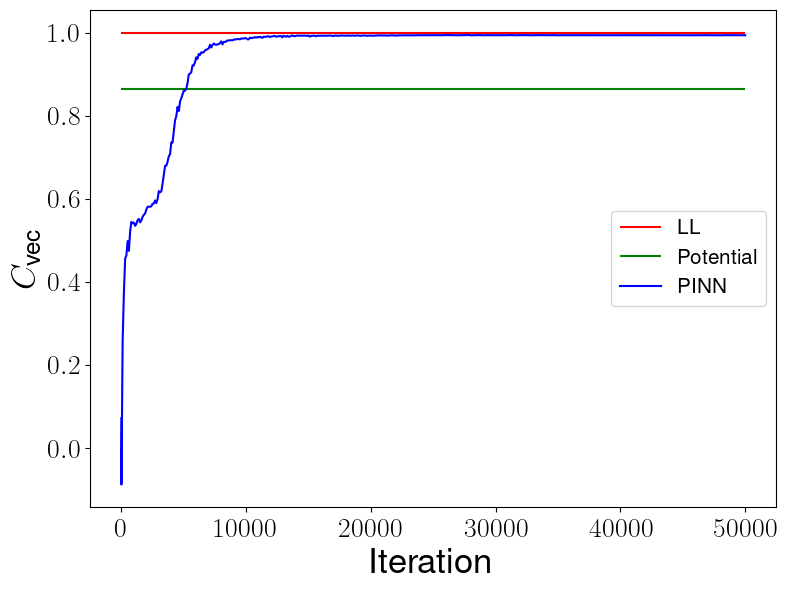

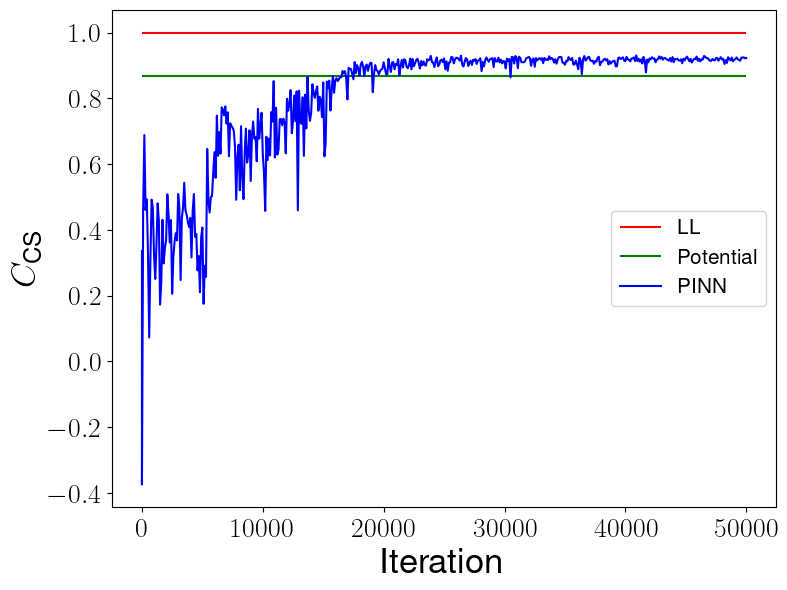

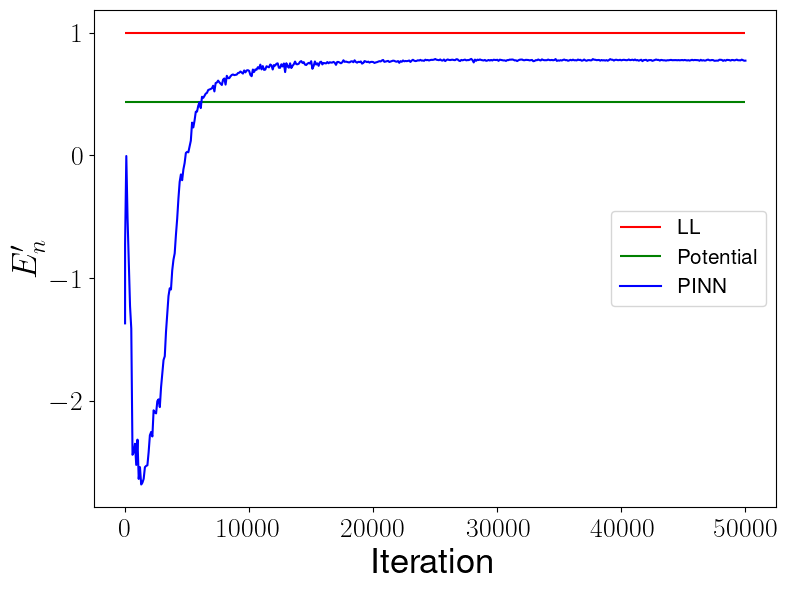

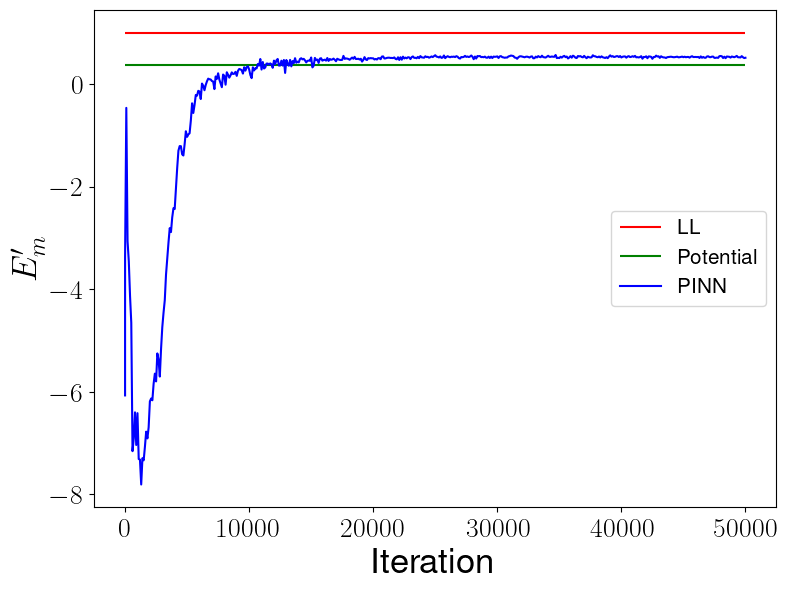

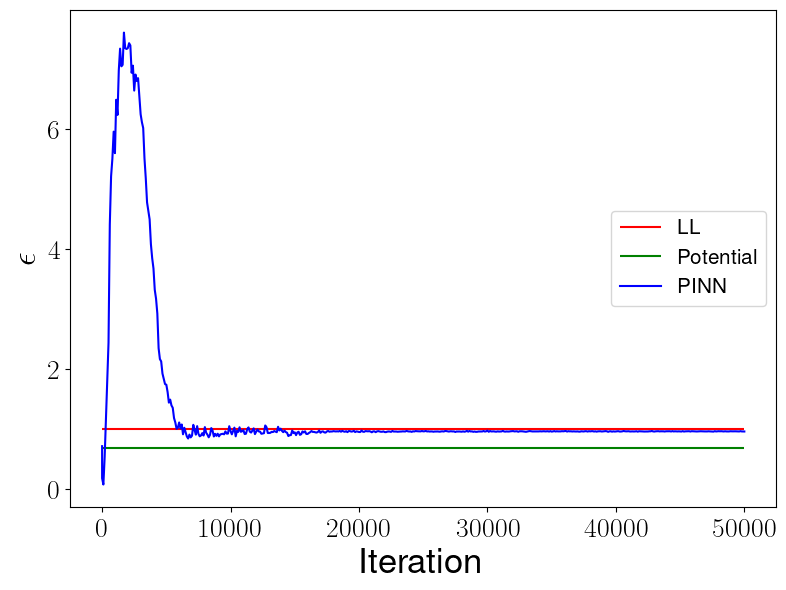

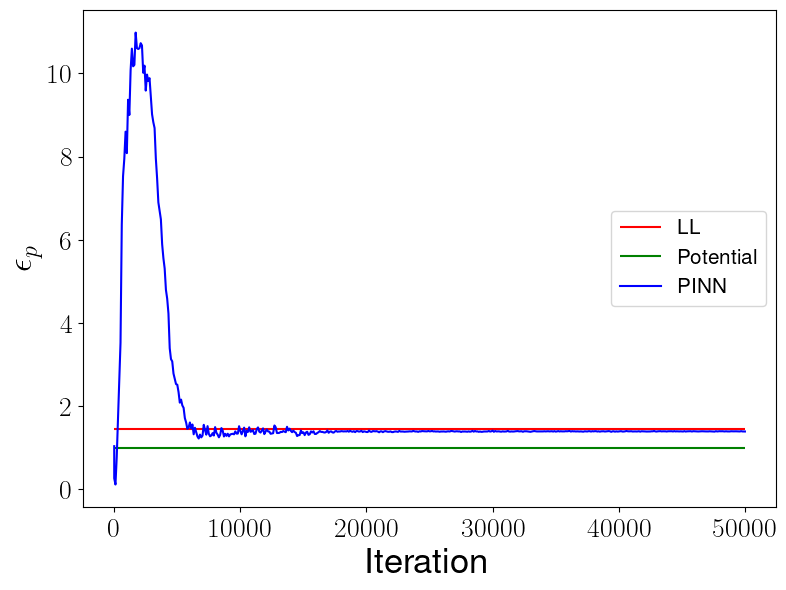

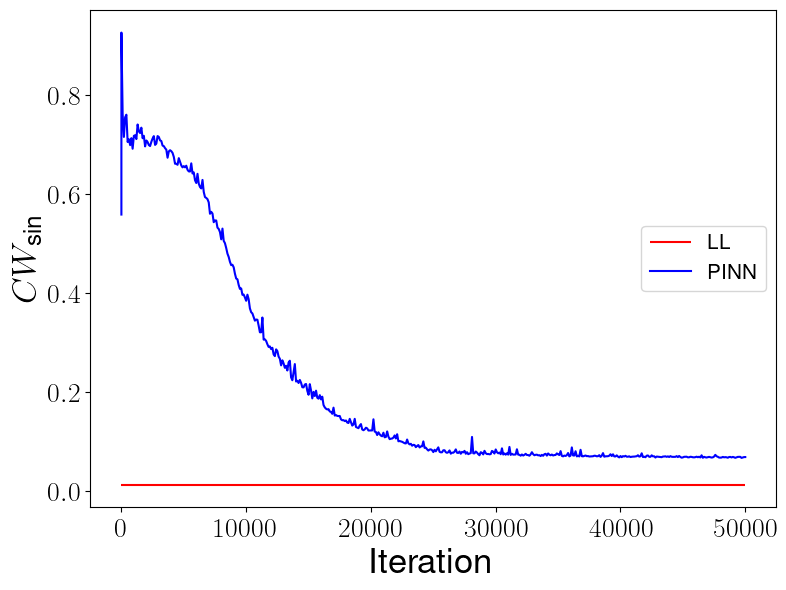

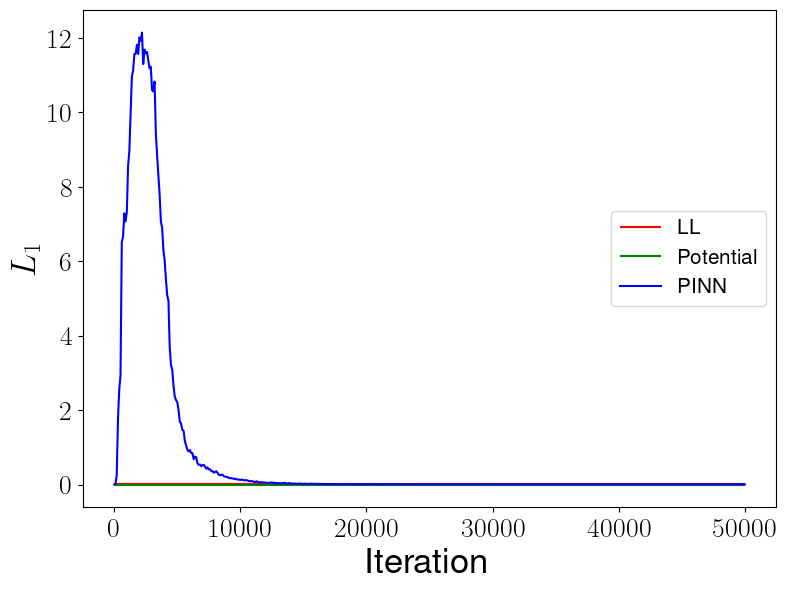

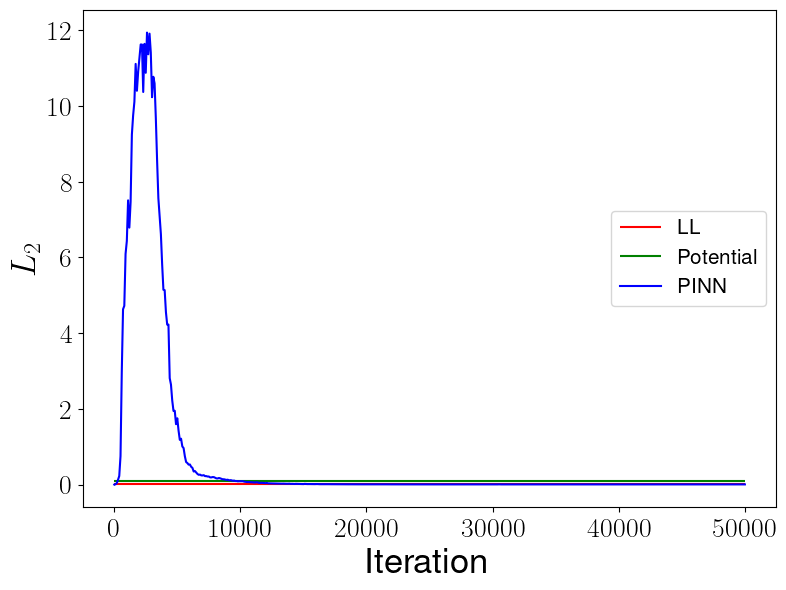

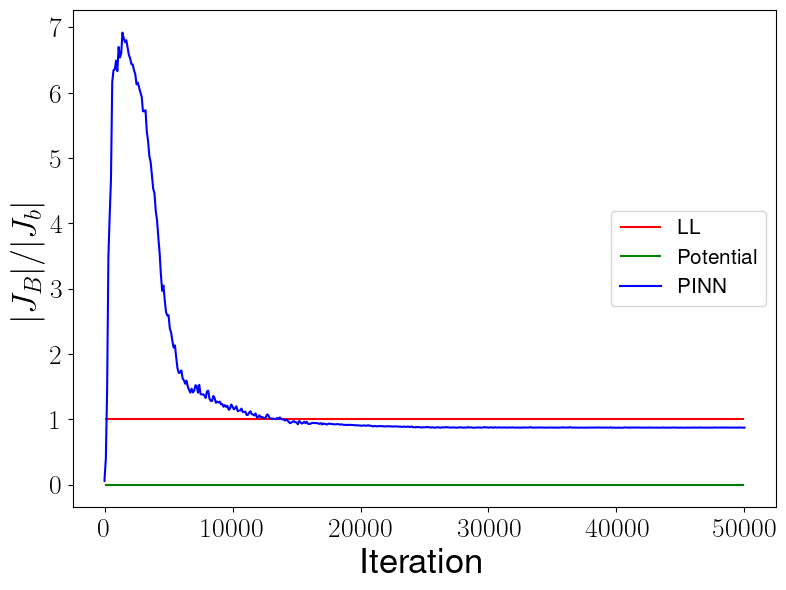

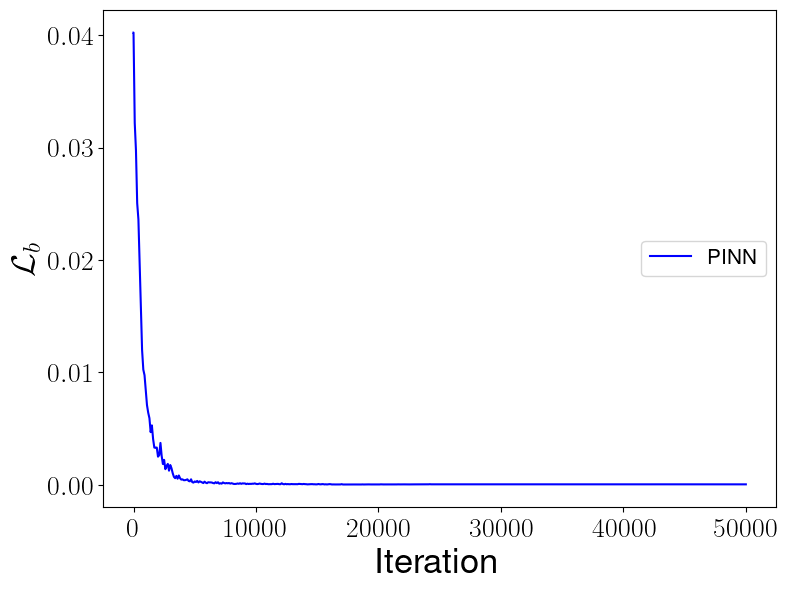

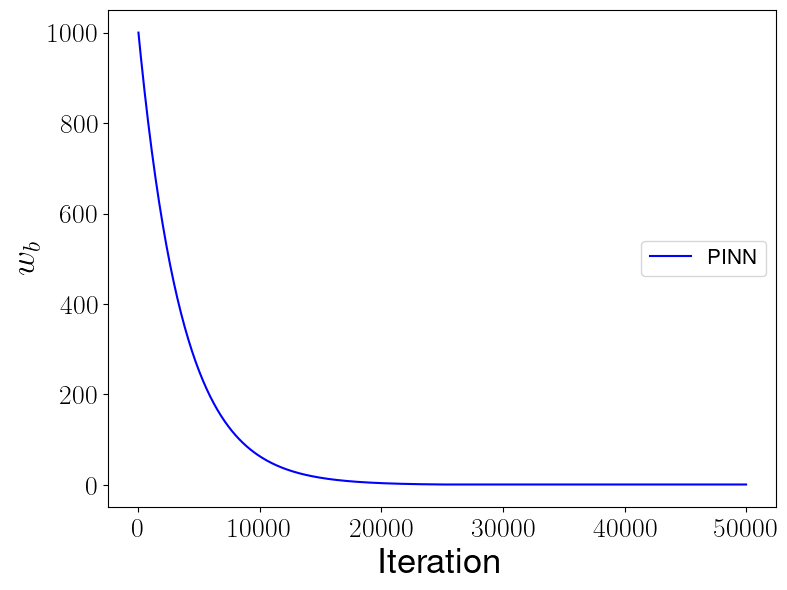

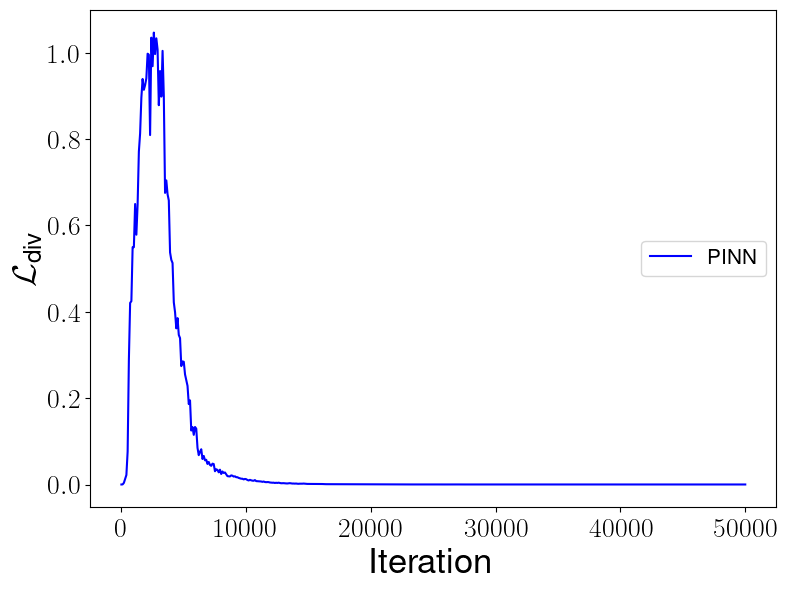

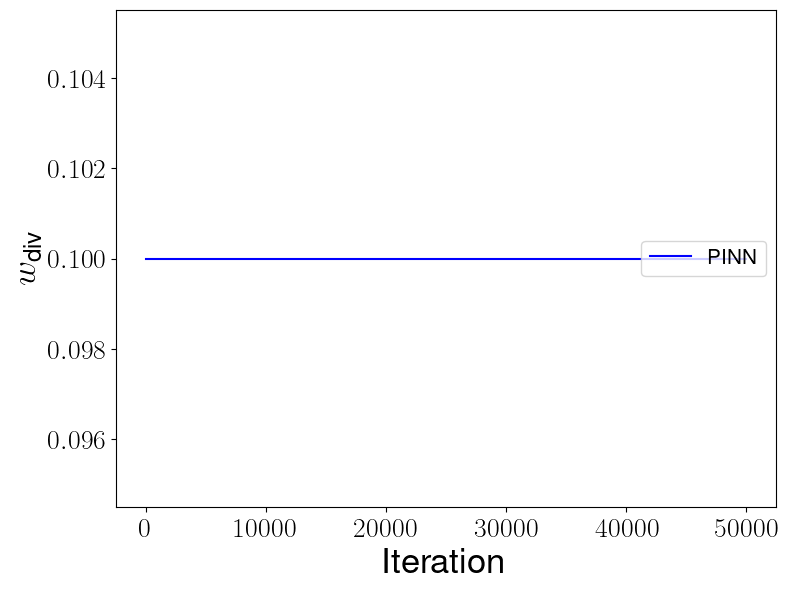

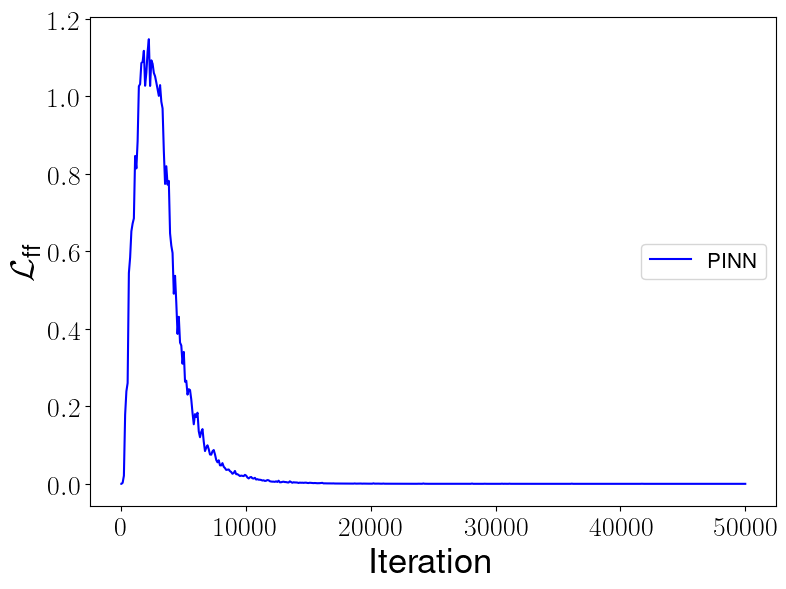

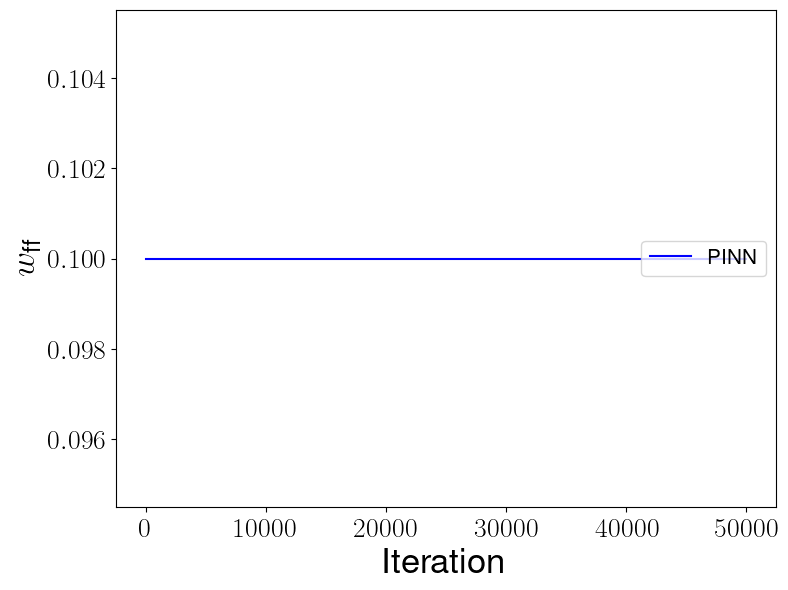

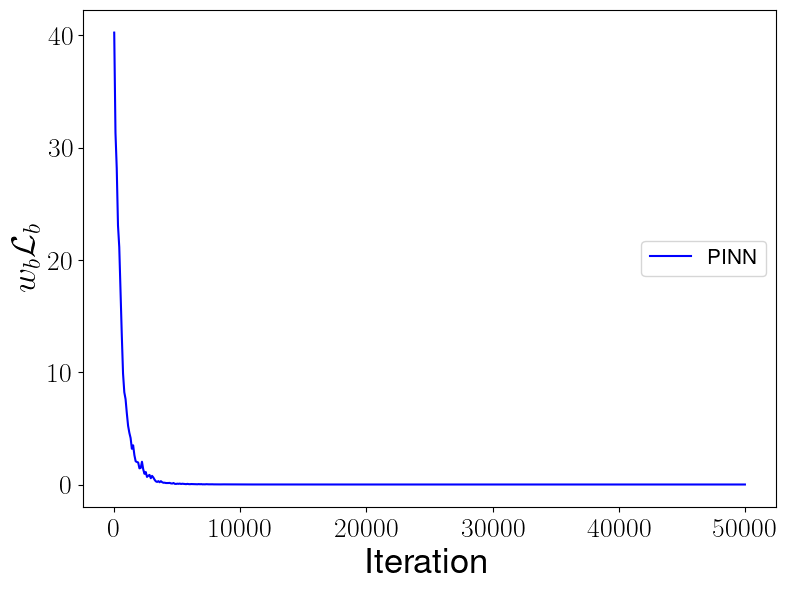

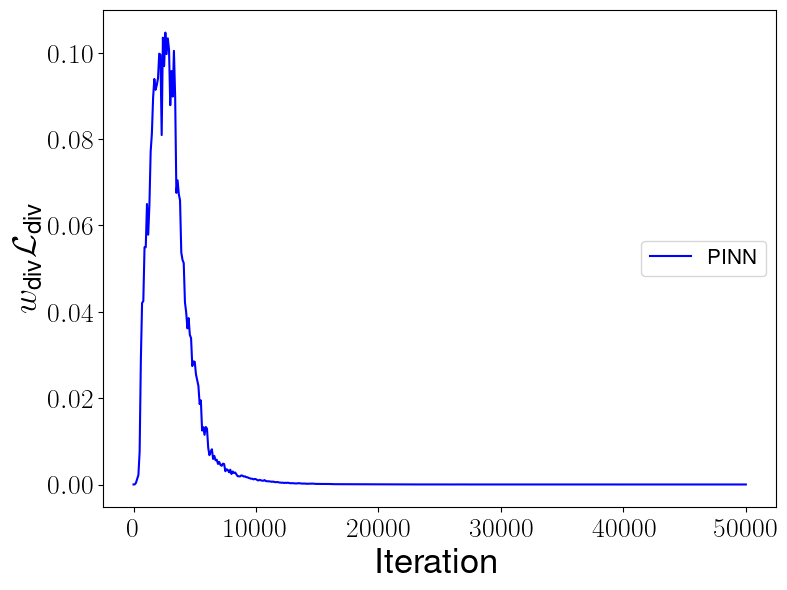

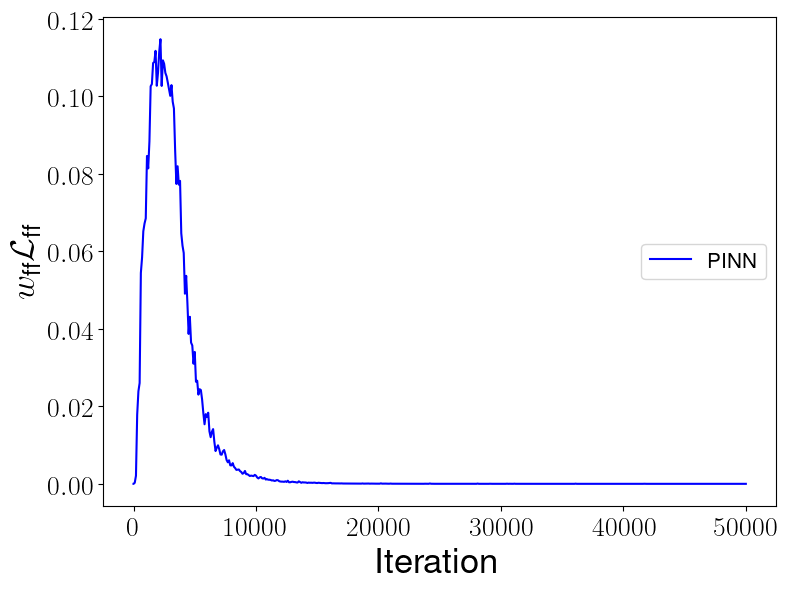

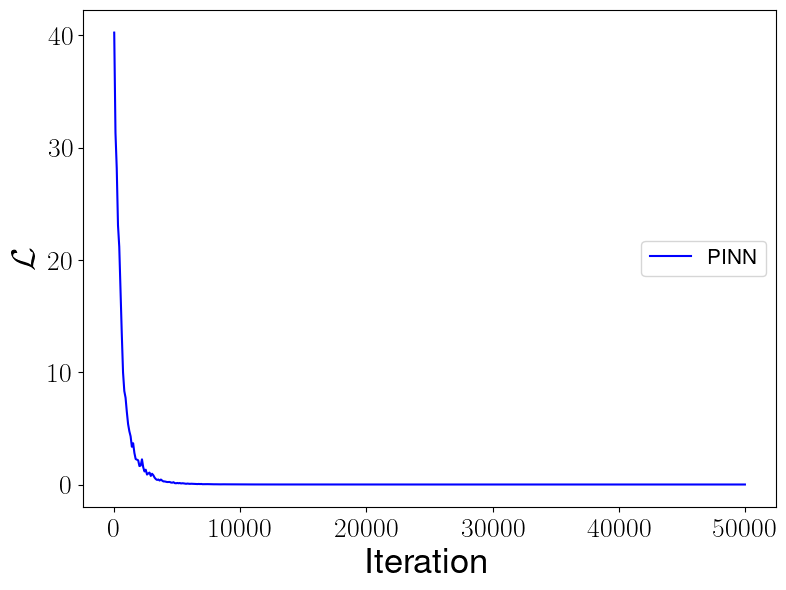

In [7]:
import codecs

def plot_metric(metrics, img_path):
    for label, metric in metrics.items():
        fig, ax = plt.subplots(figsize=(8,6))
        if not (np.isnan(metric[0]) and np.isnan(metric[1])):
            ax.hlines(metric[0], xmin=iter[2], xmax=iter[-1], color='red', label='LL')
            if not (label in [r'$CW_{\text{sin}}$']):
                ax.hlines(metric[1], xmin=iter[2], xmax=iter[-1], color='green', label='Potential')
        ax.plot(iter[2:], metric[2:], color='blue', label='PINN')
        ax.set_ylabel(label, fontsize=25)
        ax.legend(loc='center right', fontsize=15)
        ax.set_xlabel('Iteration', fontsize=25)
        ax.tick_params(axis='both', which='major', labelsize=20)
        # ax.tick_params(axis='both', which='minor', labelsize=8)
        label = label.replace('$', '')
        label = label.replace('\\', '')
        label = label.replace('/', '')
        label = codecs.decode(label, 'unicode_escape')
        plt.tight_layout()
        # fig.savefig(os.path.join(img_path, f'{label}.png'), dpi=600)

img_path = info['eval']['img_path']
# os.makedirs(img_path, exist_ok=False)
plot_metric(metrics, img_path)